In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Phasefactor matrix

def P(ni,Di,k0):
    Phasetransfer = np.zeros((2,2),dtype = 'complex');
    Phasetransfer[0,0] = np.exp(1j*k0*Di*ni)
    Phasetransfer[1,1] = np.exp(-1j*k0*Di*ni)
    return Phasetransfer

# Intensity loss matrix

def I(n1,n2):
    Loss = np.zeros((2,2),dtype = 'complex');
    Loss[0,0] = 1 + n2/n1;
    Loss[0,1] = 1 - n2/n1;
    Loss[1,0] = 1 - n2/n1;
    Loss[1,1] = 1 + n2/n1;
    Loss = Loss*0.5;
    return Loss

# Transmission matrix

def TR(n,D,k0):
    Transmission = np.eye(2,dtype = 'complex');
    for i in range(np.size(n)-1):
        Transmission = P(n[i+1],D[i+1],k0)@(I(n[i],n[i+1])@Transmission);
    Transmission = I(n[i+1],n[0])@Transmission;
    return Transmission


# Number of layers and their respective properties are passed and the Transmission matrix used to return the coefficients

def system(n,D,k):
    T = np.zeros(np.size(k));
    R = np.zeros(np.size(k));
    for i in range(np.size(k)):
        Tmatrix = TR(n,D,k[i]);
        T[i] = np.abs(Tmatrix[0,0]-(Tmatrix[0,1]*Tmatrix[1,0])/(Tmatrix[1,1]))**2;
        R[i] = np.abs(Tmatrix[1,0]/(Tmatrix[1,1]))**2;
    return T, R


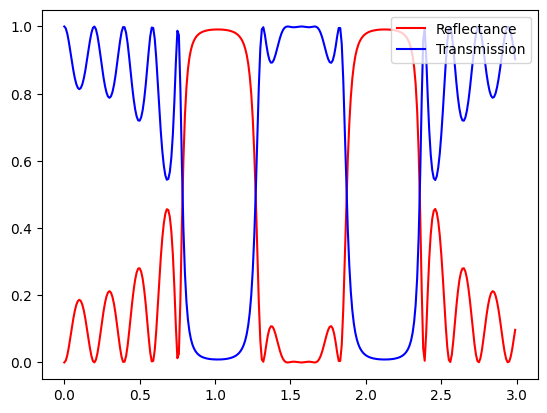

In [79]:
# Define Thicksness and refractive index
N = 10; # Number of layers. N+1 is how many surfaces there are.
D = np.ones(N); # All layers have unit thickness
n = np.ones(N); # Refractive index is alternating between 1 and 2
n[1::2] = 2;

# Define wavenumber
k0 = np.arange(0,3,0.01); # wavenumber goes from 0 to 3

# Calculate T and R coefficients
T1, R1 = system(n,D,k0)

# Plot Reflectance and Transmission
plt.figure();
plt.plot(k0,R1,'r',label="Reflectance");
plt.plot(k0,T1,'b',label="Transmission");
plt.legend(loc='upper right');
